In [107]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
os.chdir("D:\\USPA - Demand Planning v2\\Store v2\\2. Data\\Workflow\\")

In [109]:
Data = pd.read_csv("USPA Store Data.csv")
print(Data.shape)

(66791, 63)


In [113]:
#tmp = data['tra'].groupby(['air_store_id', 'dow'], as_index=False)['visitors'].min().rename(
 #   columns={'visitors': 'min_visitors'})

tmp = Data.groupby(['TERRITORY','month'],as_index =False).sum().rename(columns = {'Sum_netqty' : 'Total qty', 'Return Perc GSV' : 'Total return'})
print(tmp)

    TERRITORY   month      sum_gsv  Total qty  Total return  \
0    BIHAR-JH  201604   3652242.11       1886    101.731112   
1    BIHAR-JH  201605   3459669.99       1778    145.111886   
2    BIHAR-JH  201606   5037903.30       2937    148.545543   
3    BIHAR-JH  201607  10125375.37       7428     83.504810   
4    BIHAR-JH  201608   5881292.33       3941    209.890648   
5    BIHAR-JH  201609   3601542.00       1948    316.852673   
6    BIHAR-JH  201610   6936242.30       3522    266.825875   
7    BIHAR-JH  201611   4290125.77       2060    284.993944   
8    BIHAR-JH  201612   2937224.51       1482    361.027475   
9    BIHAR-JH  201701   6342130.95       4108    148.025501   
10   BIHAR-JH  201702   4956342.62       2994    218.057176   
11   BIHAR-JH  201703   6702338.14       3259    298.181406   
12   BIHAR-JH  201704   7431020.68       3733    248.821164   
13   BIHAR-JH  201705   6983047.98       3436    364.875554   
14   BIHAR-JH  201706  12353740.87       8125    169.02

In [73]:
Data.columns

Index(['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Prev Period Growth',
       'Prev Yr Growth', 'Total_fest', 'core_stock', 'current_stock',
       'old_stock', 'core_stock_lm', 'current_stock_lm', 'old_stock_lm',
       'GSV Growth', 'Volume Growth', 'AGE', 'TERRITORY', 'CARPET AREA',
       'TIER'],
      dtype='object')

In [74]:
Data = Data[['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid',
      'Total_fest', 'core_stock', 'current_stock','current_stock_lm',
        'AGE', 'TERRITORY', 'CARPET AREA',
       'TIER']]

In [75]:
print(Data.isnull().sum(axis=0))
#Data.dropna(how ='any', axis = 0)

New Store code               0
month                        0
sum_gsv                      0
Sum_netqty                   0
Return Perc GSV              0
Return Perc volume           0
Fill Rate                    0
Avg_Discount percentage      0
Discounted volume            0
eoss_flag                    0
eoss_days                    0
isfirstmonth                 0
ltl_gsv                      0
LTL_netqty                   0
Ugadi_Fest                   0
Bihu_Fest                    0
Ramzan_Fest                  0
Ganesh_Chaturthi             0
Dusherra_Fest                0
Diwali_Fest                  0
Christmas_Fest               0
New_Year_Fest                0
Holi                         0
Labor_Day_Fest               0
Gandhi_Jayanthi_Day_Fest     0
Good_Friday_Fest             0
Raksha_Bandhan_Fest          0
Eid                          0
Total_fest                   0
core_stock                   0
current_stock                0
current_stock_lm             0
AGE     

In [76]:
Data.dropna(how ='any', axis = 0, inplace= True)
print(Data.isnull().sum(axis=0))
print(Data.shape)
print(Data.columns)

New Store code              0
month                       0
sum_gsv                     0
Sum_netqty                  0
Return Perc GSV             0
Return Perc volume          0
Fill Rate                   0
Avg_Discount percentage     0
Discounted volume           0
eoss_flag                   0
eoss_days                   0
isfirstmonth                0
ltl_gsv                     0
LTL_netqty                  0
Ugadi_Fest                  0
Bihu_Fest                   0
Ramzan_Fest                 0
Ganesh_Chaturthi            0
Dusherra_Fest               0
Diwali_Fest                 0
Christmas_Fest              0
New_Year_Fest               0
Holi                        0
Labor_Day_Fest              0
Gandhi_Jayanthi_Day_Fest    0
Good_Friday_Fest            0
Raksha_Bandhan_Fest         0
Eid                         0
Total_fest                  0
core_stock                  0
current_stock               0
current_stock_lm            0
AGE                         0
TERRITORY 

In [77]:
Data= Data[(Data['Sum_netqty'] > 0) & (Data['ltl_gsv'] > 0) & (Data['LTL_netqty'] > 0)]
print(Data.Sum_netqty.describe())
print(Data.shape)

count    12115.000000
mean       662.793974
std        575.424316
min          1.000000
25%        288.000000
50%        494.000000
75%        848.500000
max       5577.000000
Name: Sum_netqty, dtype: float64
(12115, 36)


In [100]:
Training = Data[(Data['month'] > 201612) & (Data['month'] < 201907) ]
Test1 = Data[(Data['month'] > 201906) & (Data['month'] < 201910) ]
Test = Test1
Test.drop(['New Store code'],axis=1)
print(Training.shape)
print(Test1.shape)

(8654, 36)
(883, 36)


In [79]:
print(Test1.columns)
print(Test1.shape)
print(Training.columns)
print(Training.shape)

Index(['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Total_fest',
       'core_stock', 'current_stock', 'current_stock_lm', 'AGE', 'TERRITORY',
       'CARPET AREA', 'TIER'],
      dtype='object')
(883, 36)
Index(['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali

In [80]:
Data2 = Training
print(Data.shape)
print(Data2.shape)

(12115, 36)
(8654, 36)


In [81]:
#applying log transformation
Data2['Sum_netqty'] = np.log(Data2['Sum_netqty'])
Data2['ltl_gsv'] = np.log(Data2['ltl_gsv'])
Data2['LTL_netqty'] = np.log(Data2['LTL_netqty'])

In [82]:
Data3 = Data2[(Data2['ltl_gsv'] > 8)]
Data3 = Data3[(Data3['Sum_netqty'] > 2)]
Data3 = Data3[(Data3['LTL_netqty'] > 2)]

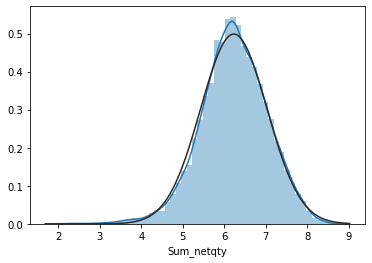

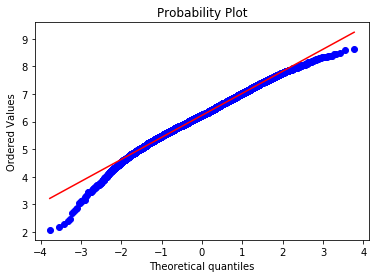

In [59]:
#histogram and normal probability plot
sns.distplot(Data3['Sum_netqty'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data3['Sum_netqty'], plot=plt)

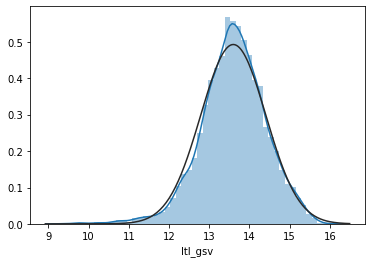

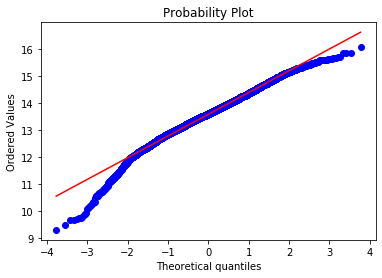

In [60]:
#histogram and normal probability plot
sns.distplot(Data3['ltl_gsv'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data3['ltl_gsv'], plot=plt)

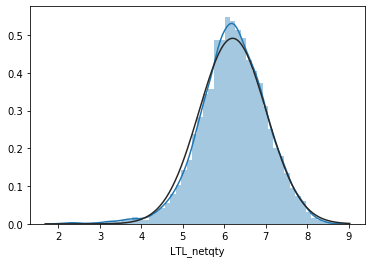

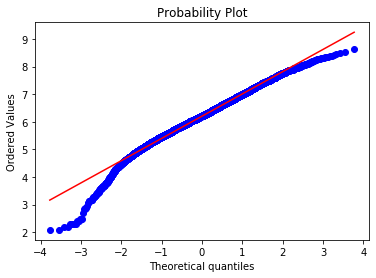

In [61]:
#histogram and normal probability plot
sns.distplot(Data3['LTL_netqty'], fit=norm);
fig = plt.figure()
res = stats.probplot(Data3['LTL_netqty'], plot=plt)

In [83]:
ModelingData = Data3.drop(['New Store code','sum_gsv'],axis=1)
print(Data3.shape)
print(ModelingData.shape)

(8616, 36)
(8616, 34)


In [84]:
Training = ModelingData

In [85]:
Test.drop(['New Store code','sum_gsv'],axis=1,inplace=True)

In [86]:
Test.columns

Index(['month', 'Sum_netqty', 'Return Perc GSV', 'Return Perc volume',
       'Fill Rate', 'Avg_Discount percentage', 'Discounted volume',
       'eoss_flag', 'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty',
       'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Total_fest',
       'core_stock', 'current_stock', 'current_stock_lm', 'AGE', 'TERRITORY',
       'CARPET AREA', 'TIER'],
      dtype='object')

In [87]:
Training_dummy = pd.get_dummies(Training)
Test_dummy = pd.get_dummies(Test)
print(Training_dummy.shape)
print(Test_dummy.shape)

(8616, 58)
(883, 57)


In [88]:
Training_dummy.columns

Index(['month', 'Sum_netqty', 'Return Perc GSV', 'Return Perc volume',
       'Fill Rate', 'Avg_Discount percentage', 'Discounted volume',
       'eoss_flag', 'eoss_days', 'isfirstmonth', 'ltl_gsv', 'LTL_netqty',
       'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest', 'Ganesh_Chaturthi',
       'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest', 'New_Year_Fest',
       'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Total_fest',
       'core_stock', 'current_stock', 'current_stock_lm', 'AGE', 'CARPET AREA',
       'TERRITORY_BIHAR-JH', 'TERRITORY_CG', 'TERRITORY_DELHINCR',
       'TERRITORY_EASTUP', 'TERRITORY_GUJARAT', 'TERRITORY_HARYANA',
       'TERRITORY_HYD', 'TERRITORY_KA 1', 'TERRITORY_KA 2', 'TERRITORY_KERALA',
       'TERRITORY_MP', 'TERRITORY_MUMBAI CENTRAL', 'TERRITORY_MUMBAI WEST',
       'TERRITORY_NORTH-EAST', 'TERRITORY_OD', 'TERRITORY_PUNJAB+',
       'TERRITORY_RAJASTHAN', 'TERRITORY_ROAT', 'TERRITORY_ROM',
       

In [89]:
# Get missing columns in the training test
missing_cols = set( Training_dummy.columns ) - set( Test_dummy.columns )
print(missing_cols)

{'TERRITORY_HARYANA'}


In [90]:
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    Test_dummy[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
Test_dummy = Test_dummy[Training_dummy.columns]

In [91]:
Train_X = Training_dummy.drop(['Sum_netqty'],axis=1)
Train_Y = Training_dummy['Sum_netqty']
Test_X = Test_dummy.drop(['Sum_netqty'],axis=1)
Test_Y = Test_dummy['Sum_netqty']
Train_X.to_csv("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\Feature_trainig_Data.csv")

In [144]:
parameters = {   "n_estimators"     : [5000,10000],
                 "learning_rate"    : [0.01,0.1,0.2] ,
                 "max_depth"        : [3,5],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.5,0.8,1 ],
                 "subsample" : [0.5,0.8,1]
             }
print(parameters)

{'n_estimators': [5000, 10000], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.5, 0.8, 1], 'subsample': [0.5, 0.8, 1]}


In [145]:
# Initialize XGB and GridSearch
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor() 
grid = RandomizedSearchCV(estimator = xgb, param_distributions = parameters,
                         n_iter = 100, cv = 3, verbose=2, random_state=42)
grid.fit(Train_X, Train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1 
[16:45:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1, total=14.6min
[CV] subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1 
[16:59:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 14.6min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1, total=14.5min
[CV] subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1 
[17:14:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=1, total=14.1min
[CV] subsample=1, n_estimators=5000, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5 
[17:28:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=5000, min_child_weight=7, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5, total= 9.2min
[CV] subsample

[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1, total=10.2min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1 
[21:25:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1, total=10.2min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1 
[21:35:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1, total=10.1min
[CV] subsample=1,

[CV]  subsample=0.5, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.3, colsample_bytree=0.8, total= 6.1min
[CV] subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.5 
[00:21:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.5, total=13.7min
[CV] subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.5 
[00:34:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.3, colsample_bytree=0.5, total=13.6min
[C

[CV]  subsample=0.5, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.5, total=13.8min
[CV] subsample=0.5, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.5 
[04:31:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.5, total=13.8min
[CV] subsample=0.8, n_estimators=10000, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8 
[04:44:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=10000, min_child_weight=1, max_depth=3, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8, total=11.9min

[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5, total= 8.6min
[CV] subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5 
[07:52:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5, total= 8.5min
[CV] subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5 
[08:00:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5, total= 8.6min
[CV] subsamp

[CV]  subsample=0.8, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.5, total=13.2min
[CV] subsample=0.8, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1 
[12:08:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1, total=19.9min
[CV] subsample=0.8, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1 
[12:28:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=10000, min_child_weight=7, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=1, total=19.9min
[CV] subs

[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=16.3min
[CV] subsample=1, n_estimators=10000, min_child_weight=3, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[16:14:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=16.2min
[CV] subsample=1, n_estimators=10000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=1 
[16:31:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=1, max_depth=5, learning_rate=0.01, gamma=0.0, colsample_bytree=1, total=19.5min
[CV] subsam

[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, total= 5.9min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8 
[20:03:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, total= 5.9min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8 
[20:09:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.1, colsample_bytree=0.8, total= 5.9min
[CV] su

[CV]  subsample=0.8, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.5, total= 4.7min
[CV] subsample=1, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[23:42:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total= 6.1min
[CV] subsample=1, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5 
[23:48:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=5000, min_child_weight=5, max_depth=5, learning_rate=0.2, gamma=0.0, colsample_bytree=0.5, total= 6.0min
[CV] subsample

[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=10.8min
[CV] subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8 
[02:36:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.1, colsample_bytree=0.8, total=10.9min
[CV] subsample=1, n_estimators=5000, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.5 
[02:47:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=5000, min_child_weight=7, max_depth=5, learning_rate=0.01, gamma=0.1, colsample_bytree=0.5, total= 6.2min
[CV] subsamp

[CV]  subsample=0.5, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=1, total= 6.9min
[CV] subsample=0.5, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=1 
[04:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=1, total= 6.8min
[CV] subsample=0.5, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=1 
[04:50:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.5, n_estimators=5000, min_child_weight=7, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=1, total= 6.8min
[CV] subsample=1,

[CV]  subsample=0.5, n_estimators=5000, min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.0, colsample_bytree=0.8, total= 6.0min
[CV] subsample=1, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[07:56:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=15.9min
[CV] subsample=1, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8 
[08:12:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.4, colsample_bytree=0.8, total=15.8min
[CV] su

[CV]  subsample=1, n_estimators=5000, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.5, total= 4.4min
[CV] subsample=1, n_estimators=5000, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.5 
[11:16:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=5000, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.5, total= 4.4min
[CV] subsample=1, n_estimators=10000, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=1 
[11:20:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=1, max_depth=5, learning_rate=0.1, gamma=0.4, colsample_bytree=1, total=18.3min
[CV] subsample=1

[CV]  subsample=0.8, n_estimators=5000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total= 5.9min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[14:41:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total= 5.9min
[CV] subsample=0.8, n_estimators=5000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8 
[14:47:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=5000, min_child_weight=3, max_depth=3, learning_rate=0.1, gamma=0.4, colsample_bytree=0.8, total= 6.0min
[CV] su

[CV]  subsample=1, n_estimators=10000, min_child_weight=3, max_depth=5, learning_rate=0.2, gamma=0.1, colsample_bytree=0.5, total=11.5min
[CV] subsample=1, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.2, colsample_bytree=1 
[17:37:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.2, colsample_bytree=1, total=12.3min
[CV] subsample=1, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.2, colsample_bytree=1 
[17:50:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=1, n_estimators=10000, min_child_weight=5, max_depth=3, learning_rate=0.2, gamma=0.2, colsample_bytree=1, total=12.2min
[CV] subsample=1, n_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 3074.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                          verbosity=1),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
  

In [92]:
#Paramerts as per the best tuning from RandomSearchCV
from xgboost import XGBRegressor
best_xgb_model = XGBRegressor(      
                base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)
best_xgb_model.fit(Train_X,Train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=1)

In [157]:
print(grid.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=7, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)


In [178]:
Test_X.to_csv("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\TestData.csv")

In [93]:
Test_X['ltl_gsv'] = np.log(Test_X['ltl_gsv'])
Test_X['LTL_netqty'] = np.log(Test_X['LTL_netqty'])

In [94]:
predictions = best_xgb_model.predict(Test_X)

In [236]:
pred= np.exp(predictions)
np.savetxt("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\Predictions_11.csv",pred)

In [95]:
import pandas as pd
feature_importances = pd.DataFrame(best_xgb_model.feature_importances_,
                                   index = Train_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
feature_importances.to_csv("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\feature_importances.csv")

                          importance
LTL_netqty                  0.217218
ltl_gsv                     0.092928
TIER_M                      0.067979
current_stock               0.049704
Holi                        0.048218
Eid                         0.039481
current_stock_lm            0.037340
Avg_Discount percentage     0.027434
TERRITORY_PUNJAB+           0.021038
eoss_flag                   0.017261
Labor_Day_Fest              0.015609
isfirstmonth                0.015392
Ramzan_Fest                 0.015093
Return Perc GSV             0.014139
TERRITORY_WUP+UKH           0.012885
CARPET AREA                 0.012781
Return Perc volume          0.012729
Christmas_Fest              0.012476
eoss_days                   0.011808
TIER_T2                     0.011217
TERRITORY_ROAT              0.010839
AGE                         0.010512
TERRITORY_WB                0.009945
TERRITORY_NORTH-EAST        0.009893
Total_fest                  0.009891
month                       0.009712
D

PermissionError: [Errno 13] Permission denied: 'D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\feature_importances.csv'

In [99]:
Predction = pd.DataFrame(predictions, columns = ['Prediction'])

In [97]:
print(Test1.shape)
print(Predction.shape)

(883, 34)
(883, 1)


In [102]:
#Test['sum_gsv'] = np.log(Test1['sum_gsv'])
Final = pd.concat([Test1.reset_index(drop=True), Predction], axis=1)

In [103]:
Test1.columns

Index(['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Total_fest',
       'core_stock', 'current_stock', 'current_stock_lm', 'AGE', 'TERRITORY',
       'CARPET AREA', 'TIER'],
      dtype='object')

In [204]:
#Test['sum_gsv'] = np.log(Test['sum_gsv'])

In [104]:
Final.columns

Index(['New Store code', 'month', 'sum_gsv', 'Sum_netqty', 'Return Perc GSV',
       'Return Perc volume', 'Fill Rate', 'Avg_Discount percentage',
       'Discounted volume', 'eoss_flag', 'eoss_days', 'isfirstmonth',
       'ltl_gsv', 'LTL_netqty', 'Ugadi_Fest', 'Bihu_Fest', 'Ramzan_Fest',
       'Ganesh_Chaturthi', 'Dusherra_Fest', 'Diwali_Fest', 'Christmas_Fest',
       'New_Year_Fest', 'Holi', 'Labor_Day_Fest', 'Gandhi_Jayanthi_Day_Fest',
       'Good_Friday_Fest', 'Raksha_Bandhan_Fest', 'Eid', 'Total_fest',
       'core_stock', 'current_stock', 'current_stock_lm', 'AGE', 'TERRITORY',
       'CARPET AREA', 'TIER', 'Prediction'],
      dtype='object')

In [105]:
#Final['Actuals'] = np.exp(Final['sum_gsv'])
Final['Predicted'] = np.exp(Final['Prediction'])

In [106]:
Final.to_csv("D:\\USPA - Demand Planning v2\\Store\\Regression\\Results\\XBG_11_19_It2.csv")